# Machine Learning with Python 
## Regression : Supervised Learning
### Preprocessing Techniques 
- sklearn/preprocessing package is used

In [4]:
import numpy as np
from sklearn import preprocessing

In [2]:
data=np.array([[3,-1.5,2,-5.4],[0,4,-0.3,2.1],[1,3.3,-1.9,-4.3]])
data

array([[ 3. , -1.5,  2. , -5.4],
       [ 0. ,  4. , -0.3,  2.1],
       [ 1. ,  3.3, -1.9, -4.3]])

#### Mean Removal
- Purpose : It involves removing the mean from each feature so that it is centered on zero. Mean removal helps in removing any bias from the features.
- Function : preprocessing.scale(data)
- Outcome : mean is centered to 0, std is centered to 1

In [7]:
ndata = preprocessing.scale(data)
print("Standard Deviation and Mean of original Data")
print(data.mean(axis=0))
print(data.std(axis=0))
print ("=" * 80)
print("Standard Deviation and Mean of data after mean removal operation")
print ("=" * 80)
print(ndata.mean(axis=0))
print(ndata.std(axis=0))

Standard Deviation and Mean of original Data
[ 1.33333333  1.93333333 -0.06666667 -2.53333333]
[1.24721913 2.44449495 1.60069429 3.30689515]
Standard Deviation and Mean of data after mean removal operation
[ 5.55111512e-17 -1.11022302e-16 -7.40148683e-17 -7.40148683e-17]
[1. 1. 1. 1.]


#### Scaling
- Purpose : Scaling is used to make features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size. This can be achieved using MinMaxScaler, to very small standard deviations of features and preserving zero entries in sparse data.
- Outcome : Data are either scale up / down depending on the range

In [8]:
ndata = (preprocessing.MinMaxScaler(feature_range=(0,1))).fit_transform(data)
print("Original Data")
print(data)
print ("=" * 50)
print("Data after Scaline operation")
print ("=" * 50)
print(ndata)

Original Data
[[ 3.  -1.5  2.  -5.4]
 [ 0.   4.  -0.3  2.1]
 [ 1.   3.3 -1.9 -4.3]]
Data after Scaline operation
[[1.         0.         1.         0.        ]
 [0.         1.         0.41025641 1.        ]
 [0.33333333 0.87272727 0.         0.14666667]]


### Normalization
- Purpose : Normalization is the process of scaling individual samples to have unit norm. 

In [10]:
ndata = preprocessing.normalize(data,norm="l1")
print("Original Data")
print(data)
print ("=" * 50)
print("Data after Normalization operation")
print ("=" * 50)
print(ndata)

Original Data
[[ 3.  -1.5  2.  -5.4]
 [ 0.   4.  -0.3  2.1]
 [ 1.   3.3 -1.9 -4.3]]
Data after Normalization operation
[[ 0.25210084 -0.12605042  0.16806723 -0.45378151]
 [ 0.          0.625      -0.046875    0.328125  ]
 [ 0.0952381   0.31428571 -0.18095238 -0.40952381]]


### Binarization
- Purpose : binarization is the process of thresholding numerical features to get boolean values.

In [11]:
ndata = preprocessing.Binarizer().transform(data)
print("Original Data")
print(data)
print ("=" * 50)
print("Data after Binarization operation")
print ("=" * 50)
print(ndata)

Original Data
[[ 3.  -1.5  2.  -5.4]
 [ 0.   4.  -0.3  2.1]
 [ 1.   3.3 -1.9 -4.3]]
Data after Binarization operation
[[1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 1. 0. 0.]]


### One Hot Encoding

In [5]:
encoder = preprocessing.OneHotEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
encoder.fit(X) 
encoder.transform([['female', 'from US', 'uses Safari'],
               ['male', 'from Europe', 'uses Safari']]).toarray()

array([[1., 0., 0., 1., 0., 1.],
       [0., 1., 1., 0., 0., 1.]])

### Label Encoding

In [7]:
le = preprocessing.LabelEncoder()
le.fit([1, 2, 2, 6])
print ("Label Encoding : ",le.transform([1, 1, 2, 6]))
print ("Reverse Encoding: ",le.inverse_transform([0, 0, 1, 2]))

Label Encoding :  [0 0 1 2]
Reverse Encoding:  [1 1 2 6]


In [8]:
le = preprocessing.LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])
print ("Label Encoding: ",le.transform(["tokyo", "tokyo", "paris"])) 
print ("Reverse Encoding: ",list(le.inverse_transform([2, 2, 1])))

Label Encoding:  [2 2 1]
Reverse Encoding:  ['tokyo', 'tokyo', 'paris']


### Building linear regressor model for predicting value

**1) Read Data from File**

In [15]:
x=[]
y=[]
fnm = "data_singlevar.txt"
with open(fnm,'r') as f:
    for line in f.readlines():
        xt,yt = [float(i) for i in line.split(',')]
        x.append(xt)
        y.append(yt)
print(x)
print ("=" * 110)
print(y)

[4.94, -1.58, -4.45, -6.06, -1.22, -3.55, 0.36, -3.24, 1.31, 2.17, 2.94, -0.92, -0.91, 1.24, 1.56, -4.14, 3.75, 4.15, 0.33, 3.41, 2.27, 2.6, 1.06, 1.04, 2.74, -0.71, -2.75, 0.55, -3.45, 1.09, 2.47, -6.35, 1.83, -0.68, -3.83, -2.03, 3.13, 0.92, 4.02, 3.89, -1.81, 3.94, -2.0, 0.54, 0.78, 2.15, 2.55, -0.63, 1.06, -0.36, 4.94, -1.58, -4.45, -6.06, -1.22, -3.55, 0.36, -3.24, 1.31, 2.17, 2.94, -0.92, -0.91, 1.24, 1.56, -4.14, 3.75, 4.15, 0.33, 3.41, 2.27, 2.6, 1.06, 1.04, 2.74, -0.71, -2.75, 0.55, -3.45, 1.09, 2.47, -6.35, 1.83, -0.68, -3.83, -2.03, 3.13, 0.92, 4.02, 3.89, -1.81, 3.94, -2.0, 0.54, 0.78, 2.15, 2.55, -0.63, 1.06, -0.36]
[4.37, 1.7, 1.88, 0.56, 2.23, 1.53, 2.99, 0.48, 2.76, 3.99, 3.25, 2.27, 2.0, 4.75, 3.52, 1.39, 4.9, 4.44, 2.72, 4.59, 5.3, 3.43, 2.53, 3.69, 3.1, 2.72, 2.82, 3.53, 1.77, 4.61, 4.24, 1.0, 3.84, 2.42, 0.67, 1.07, 3.19, 4.21, 5.24, 3.94, 2.85, 4.86, 1.31, 3.99, 2.92, 4.72, 3.83, 2.58, 2.89, 1.99, 4.37, 1.7, 1.88, 0.56, 2.23, 1.53, 2.99, 0.48, 2.76, 3.99, 3.25, 2.2

**2) Split original dataset into two parts**
- training dataset
- testing dataset

In [61]:
#### Determine ration #################################
ntrain = int(0.8 * len(x)) # 80% training dataset
ntest = len(x) - ntrain # 20% testing dataset
print ("No. of Training dataset: ",ntrain)
print ("No. of Testing dataset: ", ntest)
########### seperate training data from original data in both x and y ##########################
xtrain = np.array(x[:ntrain]).reshape((ntrain,1))
ytrain = np.array(y[:ntrain])
########### seperate testing data from original data in both x and y ##########################
xtest = np.array(x[:ntest]).reshape((ntest,1))
ytest = np.array(y[:ntest])
print (xtest)

No. of Training dataset:  80
No. of Testing dataset:  20
[[ 4.94]
 [-1.58]
 [-4.45]
 [-6.06]
 [-1.22]
 [-3.55]
 [ 0.36]
 [-3.24]
 [ 1.31]
 [ 2.17]
 [ 2.94]
 [-0.92]
 [-0.91]
 [ 1.24]
 [ 1.56]
 [-4.14]
 [ 3.75]
 [ 4.15]
 [ 0.33]
 [ 3.41]]


In [57]:
from sklearn import model_selection
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(x, y, test_size=0.2)
xtrain = np.array(xtrain).reshape((ntrain,1))
xtest = np.array(xtest).reshape((ntest,1))

**3) Train Model**

In [60]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(xtrain,ytrain)
print ("Intercept : ",lr.intercept_)
print ("Coefficient : ",lr.coef_)

Intercept :  2.92526803028878
Coefficient :  [0.39563311]


**4) Apply regressor model to testing dataset**

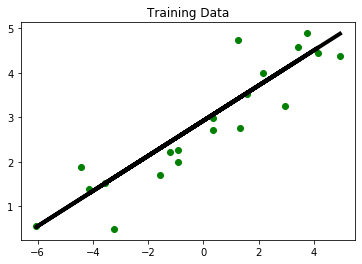

In [38]:
import matplotlib.pyplot as plt
ytest_predicted = lr.predict(xtest)
plt.scatter(xtest,ytest,color='green')
plt.plot(xtest,ytest_predicted,color='black',linewidth=4)
plt.title("Training Data")
plt.show()

**5) Determine/Evaluate Regression Accuracy**

In [40]:
import sklearn.metrics as sm
print ("Mean Absolute Error : ", round(sm.mean_absolute_error(ytest,ytest_predicted),2))
print ("Mean Squared Error : ",round(sm.mean_squared_error(ytest,ytest_predicted),2))
print ("Median Absolute Error : ",round(sm.median_absolute_error(ytest,ytest_predicted),2))
print ("Explained Variance Score : ",round(sm.explained_variance_score(ytest,ytest_predicted),2))
print ("R^2 Score: ", round(sm.r2_score(ytest,ytest_predicted),2))

Mean Absolute Error :  0.43
Mean Squared Error :  0.32
Median Absolute Error :  0.33
Explained Variance Score :  0.83
R^2 Score:  0.82


**6) Saving Model (Persistence)**

In [47]:
import pickle
fnm = 'output_model.pkl'
pickle.dump(lr, open(fnm, 'wb'))

**7) Load saved Model for predicting data**

In [49]:
llr = pickle.load(open(fnm, 'rb'))
ytest_predicted_new = llr.predict(xtest)
print ("Mean Absolute Error : ", round(sm.mean_absolute_error(ytest,ytest_predicted_new),2))
print ("Mean Squared Error : ",round(sm.mean_squared_error(ytest,ytest_predicted_new),2))
print ("Median Absolute Error : ",round(sm.median_absolute_error(ytest,ytest_predicted_new),2))
print ("Explained Variance Score : ",round(sm.explained_variance_score(ytest,ytest_predicted_new),2))
print ("R^2 Score: ", round(sm.r2_score(ytest,ytest_predicted_new),2))

Mean Absolute Error :  0.43
Mean Squared Error :  0.32
Median Absolute Error :  0.33
Explained Variance Score :  0.83
R^2 Score:  0.82
